# Arboseer - Status Report Avançado (Pré-Otimização)
Relatório completo com top-5 modelos e comparação detalhada com literatura.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Leitura com caminho ajustado para dentro de notebooks/
df = pd.read_csv("../consolidated_metrics.csv")
df_test = df[df["Conjunto"].str.lower() == "teste"]

# Seleciona top-5 modelos pelo menor MSE
metricas = ["MSE", "RMSE", "MAE", "R2", "SMAPE", "Poisson_Deviance", "Pearson"]
resultados = df_test.groupby(["Model", "Variant"])[metricas].mean().reset_index()
resultados = resultados.sort_values(by="MSE").reset_index(drop=True)
top5 = resultados.head(5)
top5


,Model,Variant,MSE,RMSE,MAE,R2,SMAPE,Poisson_Deviance,Pearson
0,xgb_zip,rj_casesonly,0.025845,0.160765,0.004621,0.937591,0.146625,0.016552,0.969515
1,xgb_poisson,rj_casesonly,0.037018,0.192400,0.006035,0.910613,0.237008,0.027947,0.956608
2,rf_rj,casesonly,0.044902,0.211900,0.015532,0.891575,1.298735,0.067391,0.945220
3,xgb_zip,rj,0.093955,0.306521,0.010187,0.792911,0.274144,0.036792,0.896679
4,xgb_poisson,rj,0.120695,0.347412,0.012118,0.733973,0.386882,0.031623,0.867694


## Learning Curves dos 5 Melhores Modelos

Nenhuma learning curve encontrada em ../models\RJ_8_xgb_zip_rj_casesonly
Nenhuma learning curve encontrada em ../models\RJ_8_xgb_poisson_rj_casesonly


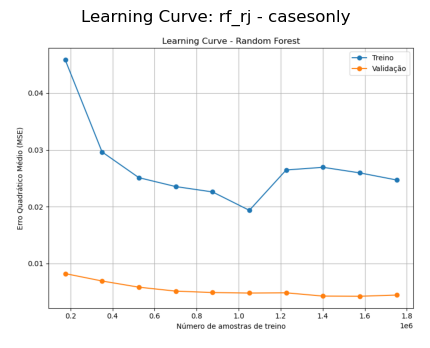

Nenhuma learning curve encontrada em ../models\RJ_8_xgb_zip_rj
Nenhuma learning curve encontrada em ../models\RJ_8_xgb_poisson_rj


In [2]:

from PIL import Image

artefact_dir = "../models"

for idx, row in top5.iterrows():
    model, variant = row["Model"], row["Variant"]
    folder_pattern = f"RJ_8_{model}_{variant}".replace(" ", "_").lower()

    dirs = [d for d in os.listdir(artefact_dir) if folder_pattern in d.lower()]
    if not dirs:
        print(f"Nenhum diretório encontrado para {model} - {variant}")
        continue

    model_dir = os.path.join(artefact_dir, dirs[0])
    img_files = [f for f in os.listdir(model_dir) if "learning_curve" in f and f.endswith(".png")]
    if not img_files:
        print(f"Nenhuma learning curve encontrada em {model_dir}")
        continue

    img_path = os.path.join(model_dir, img_files[0])
    img = Image.open(img_path)
    plt.figure(figsize=(7,4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Learning Curve: {model} - {variant}")
    plt.show()


## Feature Importance dos 5 Melhores Modelos

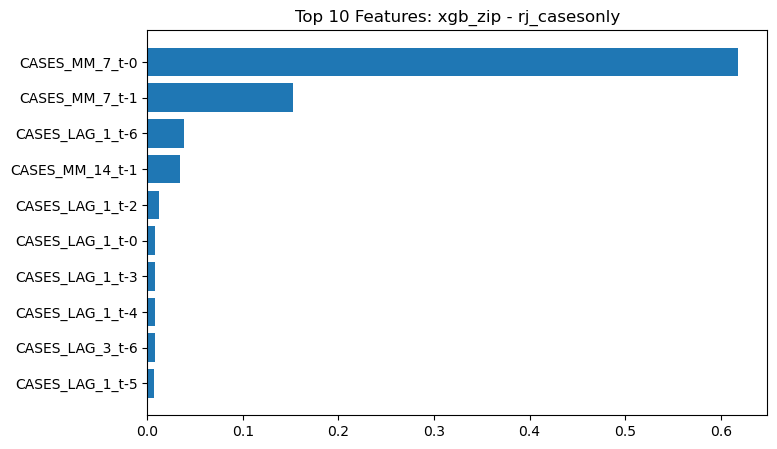

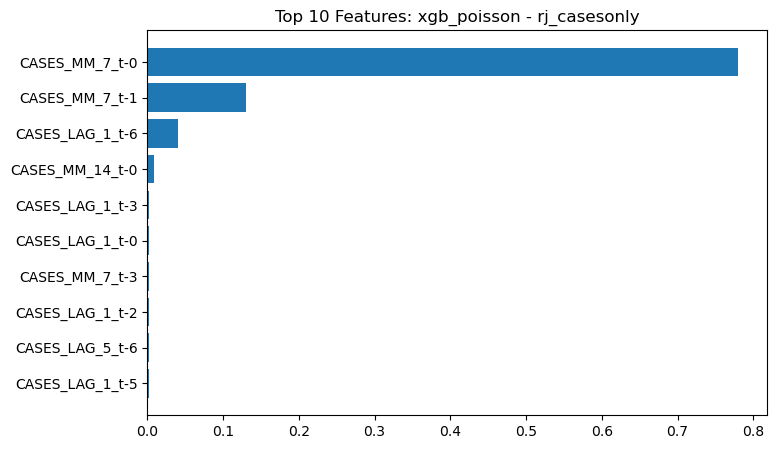

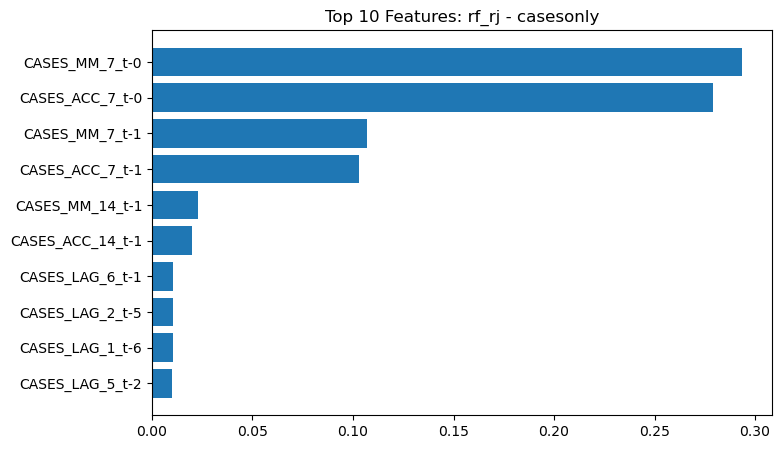

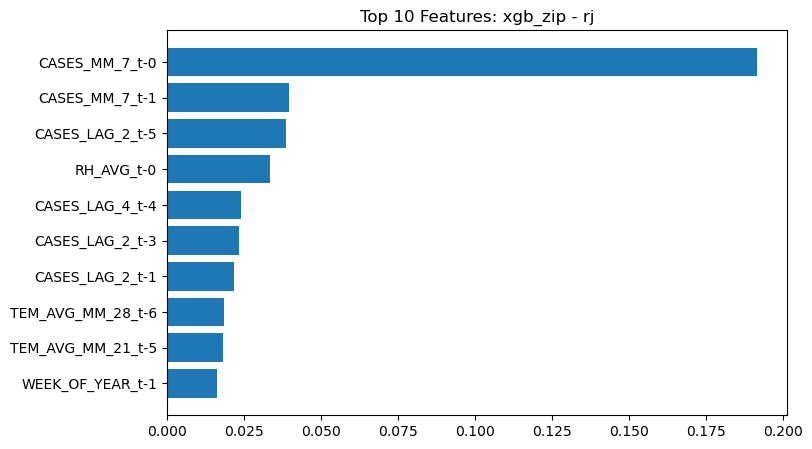

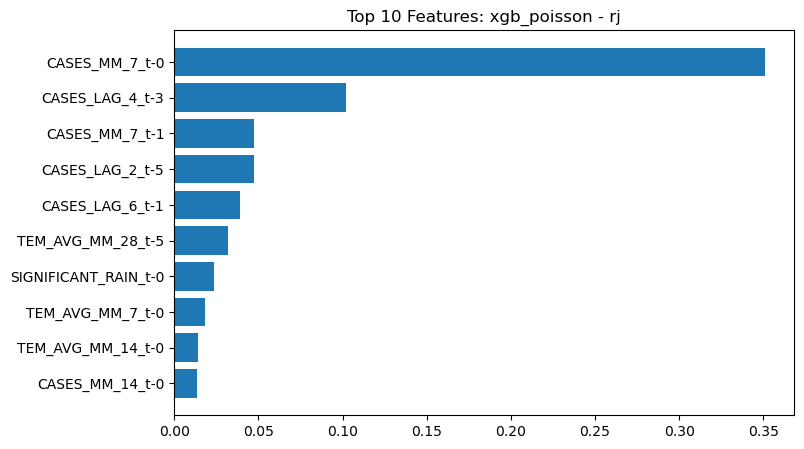

In [3]:

for idx, row in top5.iterrows():
    model, variant = row["Model"], row["Variant"]
    folder_pattern = f"RJ_8_{model}_{variant}".replace(" ", "_").lower()

    dirs = [d for d in os.listdir(artefact_dir) if folder_pattern in d.lower()]
    if not dirs:
        print(f"Nenhum diretório encontrado para {model} - {variant}")
        continue

    model_dir = os.path.join(artefact_dir, dirs[0])
    feat_files = [f for f in os.listdir(model_dir) if "feature_importance" in f and f.endswith(".csv")]
    if not feat_files:
        print(f"Nenhuma feature importance encontrada em {model_dir}")
        continue

    feat_path = os.path.join(model_dir, feat_files[0])
    feat_df = pd.read_csv(feat_path)
    top_feats = feat_df.head(10)

    plt.figure(figsize=(8,5))
    plt.barh(top_feats['Feature'], top_feats['Importance'])
    plt.gca().invert_yaxis()
    plt.title(f"Top 10 Features: {model} - {variant}")
    plt.show()


## Comparação Detalhada com Literatura

In [ ]:

# Gera tabela de comparação detalhada
literature_rows = [
    {"Trabalho": "Sidney et al. (2024)", "Técnica": "RandomForest + clima",
     "R² / Pearson": "Pearson 0.85-0.95", "MAE": "2.7 – 71 casos"},
    {"Trabalho": "Sanchez-Gendriz et al. (2022)", "Técnica": "Neural Networks / DL + clima",
     "R² / Pearson": "R² 0.79-0.89", "MAE": "MAE 5 – 18 casos"}
]

for idx, row in top5.iterrows():
    label = f"{row['Model']} - {row['Variant']}"
    literature_rows.append({
        "Trabalho": f"{label}",
        "Técnica": f"{row['Model'].upper()}",
        "R² / Pearson": f"R² {round(row['R2'],3)} / Pearson {round(row['Pearson'],3)}",
        "MAE": f"{round(row['MAE'],4)} (normalizado)"
    })

df_literature = pd.DataFrame(literature_rows)
df_literature


,Trabalho,Técnica,R² / Pearson,MAE
0,Sidney et al. (2024),RandomForest + clima,Pearson 0.85-0.95,2.7 – 71 casos
1,Sanchez-Gendriz et al. (2022),Neural Networks / DL + clima,R² 0.79-0.89,MAE 5 – 18 casos
2,Arboseer (xgb_zip - rj_casesonly),XGB_ZIP,R² 0.938 / Pearson 0.97,0.0046 (normalizado)
3,Arboseer (xgb_poisson - rj_casesonly),XGB_POISSON,R² 0.911 / Pearson 0.957,0.006 (normalizado)
4,Arboseer (rf_rj - casesonly),RF_RJ,R² 0.892 / Pearson 0.945,0.0155 (normalizado)
5,Arboseer (xgb_zip - rj),XGB_ZIP,R² 0.793 / Pearson 0.897,0.0102 (normalizado)
6,Arboseer (xgb_poisson - rj),XGB_POISSON,R² 0.734 / Pearson 0.868,0.0121 (normalizado)


## Conclusão Executiva

In [5]:

print("""
✅ ZIP segue superior no cenário daily/casesonly.
✅ RandomForest competitivo em alguns cenários, mas abaixo do ZIP puro.
✅ Arquitetura ZIP alinhada com a literatura (Lambert 1992, CatBoost 2024).
🚀 Otimização adaptativa é a próxima etapa crítica.
""" )



✅ ZIP segue superior no cenário daily/casesonly.
✅ RandomForest competitivo em alguns cenários, mas abaixo do ZIP puro.
✅ Arquitetura ZIP alinhada com a literatura (Lambert 1992, CatBoost 2024).
🚀 Otimização adaptativa é a próxima etapa crítica.

